In [1]:
import os
import io
import json
import pandas as pd
from pathlib import Path
from datetime import datetime
from time import perf_counter
from dotenv import load_dotenv
from google.cloud import bigquery

FILEPATH = Path('../')
load_dotenv('../secrets/.env', override=True)

GCP_PROJECT_NAME = os.getenv('GCP_PROJECT_NAME')
GCP_DATASET_NAME = os.getenv('GCP_DATASET_NAME')

client = bigquery.Client.from_service_account_json(FILEPATH / 'secrets' / os.getenv('SERVICE_ACCOUNT_FILE'))
dataset = client.dataset(GCP_DATASET_NAME)

# Loading Data into Bigquery Tables

One time loading process to insert data into bigquery tables. Automatic pipelines will be placed in another script.

## Investment

### ASNB

In [34]:
with open(FILEPATH / 'data/investment_vehicles/asnb.json', 'r') as f:
    asnb_data = json.loads(f.read())
    asnb_df = pd.DataFrame.from_records(asnb_data['data'])
    asnb_df['year'] = pd.to_datetime(asnb_df['year'], format='%Y')

buf = io.BytesIO()
asnb_df.to_csv(buf, index=False)
buf.seek(0)

0

In [ ]:
table_ref = dataset.table('investment_asnb')

initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.skip_leading_rows = 1
job_config.source_format = bigquery.SourceFormat.CSV
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')

Loading data into table investment_asnb...
Job finished
Successfully loaded 36 rows into the table


### KWSP

In [ ]:
with open(FILEPATH / 'data/investment_vehicles/kwsp.json', 'r') as f:
    kwsp_data = json.loads(f.read())
    kwsp_df = pd.DataFrame.from_records(kwsp_data['data'])
    kwsp_df['year'] = pd.to_datetime(kwsp_df['year'], format='%Y')

buf = io.BytesIO()
kwsp_df.to_csv(buf, index=False)
buf.seek(0)

0

In [39]:
table_ref = dataset.table('investment_kwsp')

initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.skip_leading_rows = 1
job_config.source_format = bigquery.SourceFormat.CSV
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')

Loading data into table investment_kwsp...
Job finished
Successfully loaded 74 rows into the table


### Tabung Haji

In [42]:
with open(FILEPATH / 'data/investment_vehicles/tabung_haji.json', 'r') as f:
    tabung_haji_data = json.loads(f.read())
    tabung_haji_df = pd.DataFrame.from_records(tabung_haji_data['data'])
    tabung_haji_df['year'] = pd.to_datetime(tabung_haji_df['year'], format='%Y')

buf = io.BytesIO()
tabung_haji_df.to_csv(buf, index=False)
buf.seek(0)

0

In [43]:
table_ref = dataset.table('investment_tabung_haji')

initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.skip_leading_rows = 1
job_config.source_format = bigquery.SourceFormat.CSV
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')

Loading data into table investment_tabung_haji...
Job finished
Successfully loaded 31 rows into the table


## Bonds

### Government Investment Issues

In [45]:
with open(FILEPATH / 'data/investment_vehicles/government_investment_issues.json', 'r') as f:
    gov_issue_data = json.loads(f.read())
    gov_issue_df = pd.DataFrame.from_records(gov_issue_data['data'])

buf = io.BytesIO()
gov_issue_df.to_csv(buf, index=False)
buf.seek(0)

0

In [46]:
table_ref = dataset.table('bonds_government_investment_issues')

initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.skip_leading_rows = 1
job_config.source_format = bigquery.SourceFormat.CSV
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')

Loading data into table bonds_government_investment_issues...
Job finished
Successfully loaded 11963 rows into the table


### Malaysian Government Securities

In [49]:
with open(FILEPATH / 'data/investment_vehicles/malaysian_government_securities.json', 'r') as f:
    gov_securities_data = json.loads(f.read())
    gov_securities_df = pd.DataFrame.from_records(gov_securities_data['data'])

buf = io.BytesIO()
gov_securities_df.to_csv(buf, index=False)
buf.seek(0)

0

In [51]:
table_ref = dataset.table('bonds_government_securitites')

initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.skip_leading_rows = 1
job_config.source_format = bigquery.SourceFormat.CSV
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')

Loading data into table bonds_government_securitites...
Job finished
Successfully loaded 19147 rows into the table


## Pricecatcher

### Item Lookup

In [56]:
with open(FILEPATH / 'data/consumer_metrics/lookup_item.parquet', 'rb') as f:
    buf = io.BytesIO(f.read())
    buf.seek(0)

table_ref = dataset.table('pricecatcher_item_lookup')
initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.source_format = bigquery.SourceFormat.PARQUET
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')

Loading data into table pricecatcher_item_lookup...
Job finished
Successfully loaded 757 rows into the table


### Premise Lookup

In [82]:
premise_df = (
    pd.read_parquet(FILEPATH / 'data/consumer_metrics/lookup_premise.parquet')
    .dropna(how='all', subset='premise_code')
    .astype({'premise_code': int})
)

buf = io.BytesIO()
premise_df.to_parquet(buf, index=False)
buf.seek(0)

table_ref = dataset.table('pricecatcher_premise_lookup')
initial_row_count = client.get_table(table_ref).num_rows

job_config = bigquery.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
job_config.source_format = bigquery.SourceFormat.PARQUET
load_job = client.load_table_from_file(
    buf, table_ref, job_config=job_config
)
print(f'Loading data into table {table_ref.table_id}...')

load_job.result()
loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

print('Job finished')
print(f'Successfully loaded {loaded_rows} rows into the table')


Loading data into table pricecatcher_premise_lookup...
Job finished
Successfully loaded 2995 rows into the table


### Pricecatcher Transactions

In [3]:
def batch_slice(df, batch_size):
    n = df.shape[0]
    for i in range(0, n//batch_size + 1):
        yield df.loc[batch_size*i:batch_size*(i+1)-1, :]

In [ ]:
buf_timer = []
upload_timer = []
pricecatcher_paths = sorted([fp.path for fp in os.scandir(FILEPATH / 'data/consumer_metrics/') if fp.name.startswith('pricecatcher_annual')])

for fp in pricecatcher_paths:
    transaction_df = pd.read_parquet(fp)
    transaction_df['date'] = pd.to_datetime(transaction_df['date'], format='%Y-%m-%d')
    transaction_df = transaction_df.reset_index(drop=True).astype({'date': 'datetime64[s]'})

    transaction_df.dtypes

    for idx, df_slice in enumerate(batch_slice(transaction_df, 1_000_000)):
        if idx == 0:
            continue

        buf_t = perf_counter()
        buf = io.BytesIO()
        df_slice.to_parquet(buf, index=False)
        buf.seek(0)
        buf_t2 = perf_counter() - buf_t
        buf_timer.append(buf_t2)
        print(f'Loaded data to buffer in {buf_t2:.3f} seconds')

        table_ref = dataset.table('pricecatcher_transactional_record')
        initial_row_count = client.get_table(table_ref).num_rows

        job_config = bigquery.LoadJobConfig()
        job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
        job_config.source_format = bigquery.SourceFormat.PARQUET
        load_job = client.load_table_from_file(
            buf, table_ref, job_config=job_config
        )
        print(f'Loading data into table {table_ref.table_id}...')

        load_t = perf_counter()
        load_job.result()
        load_t2 = perf_counter() - load_t
        upload_timer.append(load_t2)
        loaded_rows = client.get_table(table_ref).num_rows - initial_row_count

        print('Job finished')
        print(f'Successfully loaded {loaded_rows} rows into the table after {load_t2:.3f} seconds')

Loaded data to buffer in 0.057 seconds
Loading data into table pricecatcher_transactional_record...
Job finished
Successfully loaded 1000000 rows into the table after 3.379 seconds
Loaded data to buffer in 0.058 seconds
Loading data into table pricecatcher_transactional_record...
Job finished
Successfully loaded 1000000 rows into the table after 3.681 seconds
Loaded data to buffer in 0.052 seconds
Loading data into table pricecatcher_transactional_record...
Job finished
Successfully loaded 1000000 rows into the table after 3.898 seconds
Loaded data to buffer in 0.061 seconds
Loading data into table pricecatcher_transactional_record...
Job finished
Successfully loaded 1000000 rows into the table after 3.251 seconds
Loaded data to buffer in 0.060 seconds
Loading data into table pricecatcher_transactional_record...
Job finished
Successfully loaded 1000000 rows into the table after 3.507 seconds
Loaded data to buffer in 0.059 seconds
Loading data into table pricecatcher_transactional_recor

count    66.000000
mean      0.056866
std       0.009801
min       0.006492
25%       0.056920
50%       0.058954
75%       0.061162
max       0.064719
dtype: float64

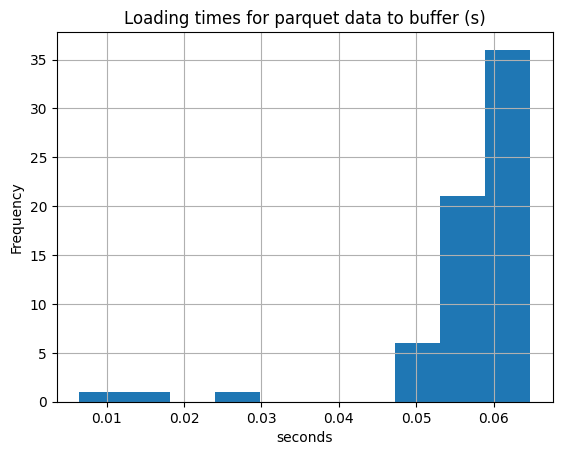

In [32]:
buf_series = pd.Series(buf_timer)
buf_series.plot(kind='hist', xlabel='seconds', grid=True, title='Loading times for parquet data to buffer (s)')
display(pd.Series(buf_series).describe())

count    66.000000
mean      3.260316
std       1.000604
min       1.832039
25%       2.692937
50%       3.094454
75%       3.725701
max       7.585578
dtype: float64

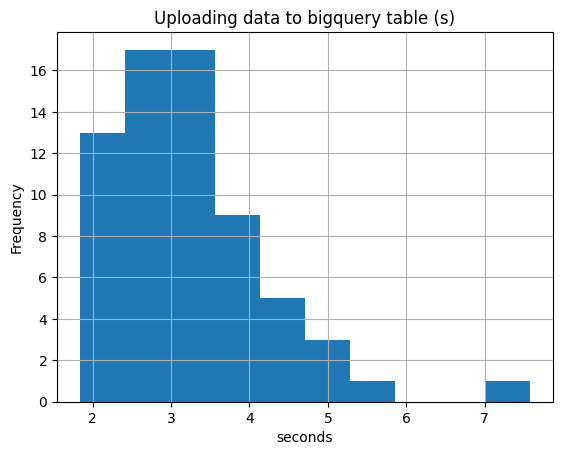

In [33]:
upload_series = pd.Series(upload_timer)
upload_series.plot(kind='hist', xlabel='seconds', grid=True, title='Uploading data to bigquery table (s)')
display(pd.Series(upload_series).describe())